In [18]:
#based on https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt

import seaborn as sns
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

In [19]:
# Importing dataset
#https://www.kaggle.com/datasets/team-ai/spam-text-message-classification
df=pd.read_csv('text_exploration_spam_mails.csv',sep=',')
df.shape

(5572, 2)

In [20]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [22]:
# convert column "a" to int64 dtype and "b" to complex type
df = df.astype({"Category": str, "Message": str})

# Sentiment Analysis (and Recommendations)

In [23]:
#Sentiment Analysis
from textblob import TextBlob
#Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment.
df['polarity']=df['Message'].apply(lambda x:TextBlob(x).sentiment.polarity)
df

,Category,Message,polarity
0,ham,"Go until jurong point, crazy.. Available only ...",0.150000
1,ham,Ok lar... Joking wif u oni...,0.500000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.300000
3,ham,U dun say so early hor... U c already then say...,0.100000
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.000000
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0.180556
5568,ham,Will ü b going to esplanade fr home?,0.000000
5569,ham,"Pity, * was in mood for that. So...any other s...",-0.112500
5570,ham,The guy did some bitching but I acted like i'd...,0.216667


In [35]:
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
df['subjectivity']=df['Message'].apply(lambda x:TextBlob(x).sentiment.subjectivity)
df

,Category,Message,polarity,dale_chall_score,flesh_reading_ease,gunning_fog,reading_time,subjectivity
0,ham,"Go until jurong point, crazy.. Available only ...",0.150000,11.86,90.05,2.68,1.35,0.762500
1,ham,Ok lar... Joking wif u oni...,0.500000,17.09,99.23,2.40,0.35,0.500000
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.300000,13.92,82.65,5.60,1.88,0.550000
3,ham,U dun say so early hor... U c already then say...,0.100000,9.65,99.73,2.20,0.57,0.300000
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.000000,6.71,109.04,5.20,0.72,0.000000
...,...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,0.180556,10.32,97.70,4.33,1.92,0.611111
5568,ham,Will ü b going to esplanade fr home?,0.000000,11.93,88.74,3.20,0.43,0.000000
5569,ham,"Pity, * was in mood for that. So...any other s...",-0.112500,7.37,92.29,6.24,0.71,0.287500
5570,ham,The guy did some bitching but I acted like i'd...,0.216667,6.75,70.47,10.40,1.47,0.433333


In [24]:
#Group data frame by category
df_grouped=df.groupby('Category',as_index=False)['polarity'].mean()
df_grouped

,Category,polarity
0,ham,0.116524
1,spam,0.189458


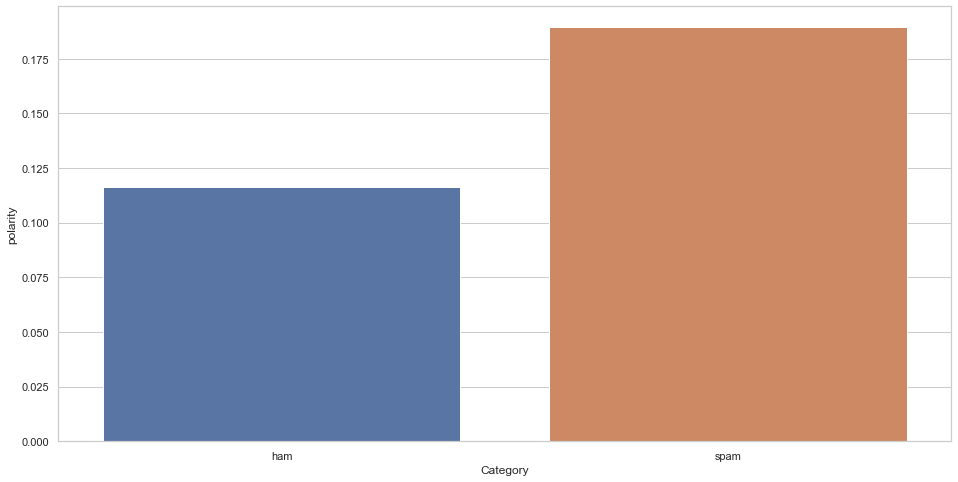

In [25]:
#Plot sentiment polarities
plt.figure(figsize=(16,8))

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Category", y="polarity", data=df_grouped)

plt.show()

# Text Readability

In [26]:
import textstat
df['dale_chall_score']=df['Message'].apply(lambda x: textstat.dale_chall_readability_score(x))
df['flesh_reading_ease']=df['Message'].apply(lambda x: textstat.flesch_reading_ease(x))
df['gunning_fog']=df['Message'].apply(lambda x: textstat.gunning_fog(x))

print('Dale Chall Score of blog entries: ',df['dale_chall_score'].mean())

print('Flesch Reading Score of blog entries: ',df['flesh_reading_ease'].mean())

print('Gunning Fog Index of blog entries: ',df['gunning_fog'].mean())

Dale Chall Score of blog entries:  9.207236180904433
Flesch Reading Score of blog entries:  91.69825735821877
Gunning Fog Index of blog entries:  4.56803481694186


# Reading Time

In [27]:
df['reading_time']=df['Message'].apply(lambda x: textstat.reading_time(x))

print('Reading Time of: ',df['reading_time'].mean())

Reading Time of:  0.9652010050251286


# Group Documents

In [28]:
#Group messages by category this time keeping the texts of all messages
df_grouped=df[['Category','Message']].groupby(by='Category').agg(lambda x:' '.join(x))
df_grouped.head()

,Message
Category,
ham,"Go until jurong point, crazy.. Available only ..."
spam,Free entry in 2 a wkly comp to win FA Cup fina...


# Matrix Transformation - Term Occurences

In [29]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['Message'])
df_to = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_to.index=df_grouped.index
df_to.head(3)

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
Category,,,,,,,,,,,,,,,,,,,,,
ham,0,0,1,0,0,0,0,0,1,0,...,1,2,1,1,1,0,1,1,0,1
spam,10,29,0,2,1,1,1,2,0,8,...,0,0,1,0,0,1,0,0,1,0


# Matrix Transformation - Term Frequencies

In [30]:
#Calculate total numer of terms per document and store in series object
terms_per_document = df_to.sum(axis=1)
data_series=pd.Series(terms_per_document)
data_series

Category
ham     62967
spam    17416
dtype: int64

In [31]:
#Calculate term frequencies from occurances and total number of terms
df_tf = df_to.divide(data_series, axis=0 )
df_tf

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
Category,,,,,,,,,,,,,,,,,,,,,
ham,0.000000,0.000000,0.000016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000016,0.000000,...,0.000016,0.000032,0.000016,0.000016,0.000016,0.000000,0.000016,0.000016,0.000000,0.000016
spam,0.000574,0.001665,0.000000,0.000115,0.000057,0.000057,0.000057,0.000115,0.000000,0.000459,...,0.000000,0.000000,0.000057,0.000000,0.000000,0.000057,0.000000,0.000000,0.000057,0.000000


# Matrix Transformation - TFIDF

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer() 
# just send in all your docs here 

docs=df_grouped['Message']

#calculate TFIDF values
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)

#transform to array
transformed_documents_as_array = tfidf_vectorizer_vectors.toarray()

In [33]:
#create tfidf data frame
df_tfidf = pd.DataFrame(transformed_documents_as_array,columns=tfidf_vectorizer.get_feature_names(), index=df_grouped.index) 
df_tfidf

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
Category,,,,,,,,,,,,,,,,,,,,,
ham,0.000000,0.00000,0.000324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000324,0.000000,...,0.000324,0.000649,0.000231,0.000324,0.000324,0.000000,0.000324,0.000324,0.000000,0.000324
spam,0.011217,0.03253,0.000000,0.002243,0.001122,0.001122,0.001122,0.002243,0.000000,0.008974,...,0.000000,0.000000,0.000798,0.000000,0.000000,0.001122,0.000000,0.000000,0.001122,0.000000


# Word Clouds

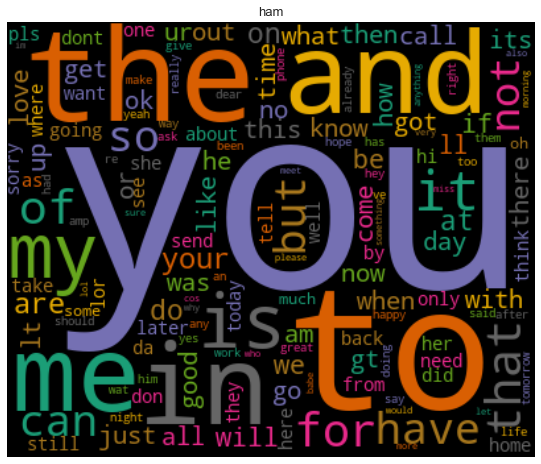

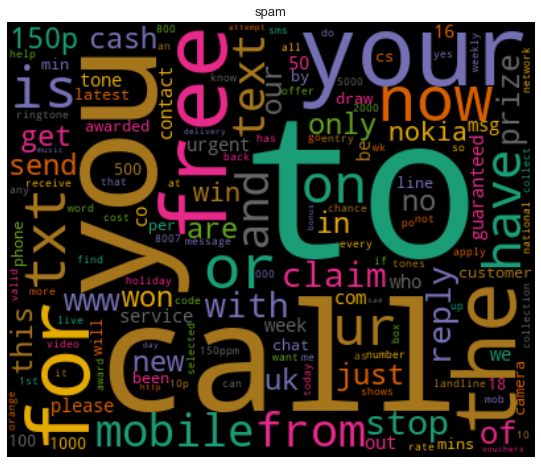

In [34]:
#Create word cloud

#conda install -c conda-forge wordcloud

# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_to.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)